In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

headers = ["Url", "Category","Position", "Title", "Location","Amount_Raised", "Goal", "Number_of_Donators",
           "Length_of_Fundraising", "FB_Shares", "GFM_hearts", "Text", "Latitude", "Longitude"]

df = pd.read_csv('GFM_data.csv', sep = '\t', encoding = 'latin1')


df.head()

,Unnamed: 0,Url,Category,Position,Title,Location,Amount_Raised,Goal,Number_of_Donators,Length_of_Fundraising,FB_Shares,GFM_hearts,Text,Latitude,Longitude
0,0,https://www.gofundme.com/3ctqm-medical-bills-f...,Medical,0,92 Yr old Man Brutally Attacked.,"LOS ANGELES, CA",327345.0,"15,000","12,167",1 month,26k,12k,Rodolfo Rodriguez needs your help today! 92 Yr...,34.052234,-118.243685
1,1,https://www.gofundme.com/olivia-stoy-bone-marr...,Medical,0,Olivia Stoy:Transplant & Liv it up!,"ASHLEY, IN",316261.0,1.0M,"5,598",3 months,12k,5.7k,Thomas Stoy needs your help today! Olivia Stoy...,41.527272,-85.065523
2,2,https://www.gofundme.com/autologous-Tcell-Tran...,Medical,1,AUTOLOGOUS T CELL TRANSPLANT,"STATEN ISLAND, NY",241125.0,"250,000",841,2 months,1.8k,836,Philip Defonte needs your help today! AUTOLOGO...,40.579532,-74.150201
3,3,https://www.gofundme.com/a-chance-of-rebirth,Medical,1,A chance of rebirth,"DUBLIN, CA",237424.0,"225,000","4,708",1 month,9.7k,4.7k,Sriram Kanniah needs your help today! A chance...,37.702152,-121.935792
4,4,https://www.gofundme.com/teamclaire,Medical,1,Claire Wineland Needs Our Help,"GARDEN GROVE, CA",236590.0,"225,000","8,393",2 months,6.4k,8.9k,Melissa Yeager needs your help today! Claire W...,33.774269,-117.937995


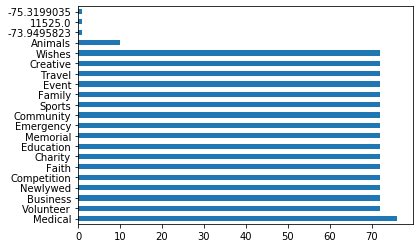

In [11]:
df['Category'].value_counts().plot(kind='barh')